## Exercice 1 : décroissance radioactive
Intégrer avec les trois méthodes d'Euler l'équation de la décroissance radioactive. Comparer vos résultats et discuter de la stabilité
$$
\frac{d y}{dt}=-\lambda y, \quad y(t=0)=y_{0}
$$

## Solution :
### Euler avant :
$$y_{i+1}=y_{i}-h\lambda y_i$$
$$\Rightarrow y_{i+1} = (1-h\lambda)y_i$$

### Euler arrière :
$$y_{i+1}=y_{i}-h\lambda y_{i+1}$$
$$\Rightarrow y_{i+1} = \frac{1}{1+h\lambda}y_i$$

### Euler centré :
$$y_{i+1}=x_{i}-\frac{h}{2}\lambda\left(y_i + y_{i+1}\right)$$
$$\Rightarrow y_{i+1} = \frac{1-\frac{h\lambda}{2}}{1+\frac{h\lambda}{2}}$$

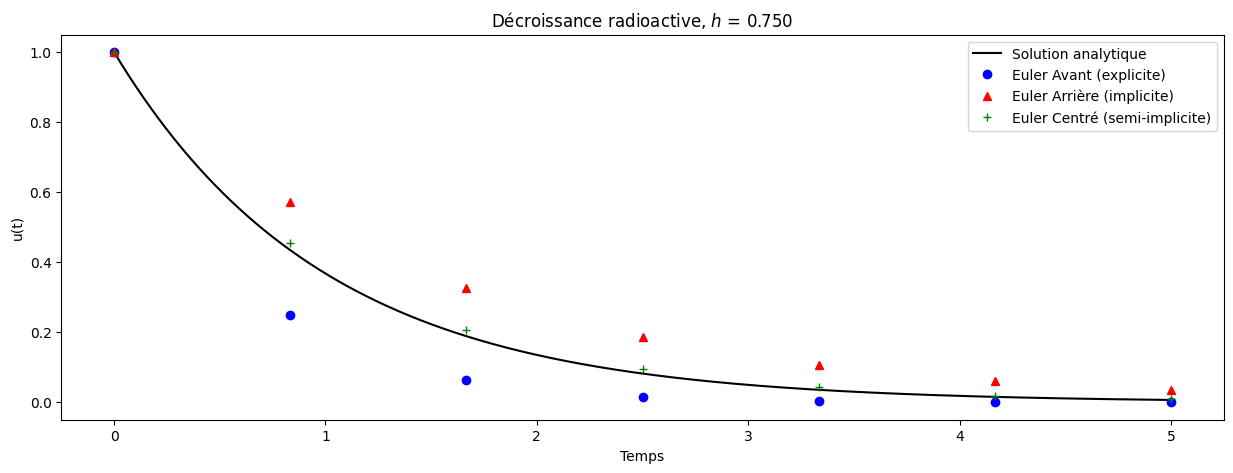

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques (lambda représente le taux de décroissance)
lmb = 1

# Paramètres numériques
t_max = 5  # Temps maximum de simulation
h = 0.75  # Pas de temps
N = int(np.floor(t_max / h)) + 1  # Nombre total de points de temps
t = np.linspace(0, t_max, N)  # Tableau de temps

# Initialisation des tableaux pour les solutions des trois méthodes
u_Euler_avant = np.zeros(N)  # Méthode d'Euler avant (forward)
u_Euler_arriere = np.zeros(N)  # Méthode d'Euler arrière (backward)
u_Euler_centre = np.zeros(N)  # Méthode d'Euler centré (centered)

# Condition initiale (à t=0, u(0) = 1)
u0 = 1

u_Euler_avant[0] = u0
u_Euler_arriere[0] = u0
u_Euler_centre[0] = u0

# Boucle temporelle pour appliquer les différentes méthodes d'intégration
for i in range(N - 1):
    # Méthode d'Euler avant (explicite)
    u_Euler_avant[i+1] = (1 - h * lmb) * u_Euler_avant[i]

    # Méthode d'Euler arrière (implicite)
    u_Euler_arriere[i+1] = u_Euler_arriere[i] / (1 + h * lmb)

    # Méthode d'Euler centrée (semi-implicite)
    u_Euler_centre[i+1] = ((1 - h * lmb / 2) /
                           (1 + h * lmb / 2)) * u_Euler_centre[i]

# Tracé des résultats
fig, ax = plt.subplots(figsize=(15, 5))

# Solution analytique de décroissance exponentielle
# Plus de points pour la courbe analytique
t_continu = np.linspace(0, t_max, 1001)
u_analytique = np.exp(-lmb * t_continu)  # Solution exacte

# Tracé de la solution analytique
ax.plot(t_continu, u_analytique, label='Solution analytique', color='black')

# Tracés des solutions numériques
ax.plot(t, u_Euler_avant, 'o', label='Euler Avant (explicite)', color='blue')
ax.plot(t, u_Euler_arriere, '^', label='Euler Arrière (implicite)', color='red')
ax.plot(t, u_Euler_centre, '+',
        label='Euler Centré (semi-implicite)', color='green')

# Configuration du graphique
ax.legend()
ax.set_title('Décroissance radioactive, $h$ = %.3f' % h)
ax.set_xlabel('Temps')
ax.set_ylabel('u(t)')
plt.show()

## Exercice 2 : équation logistique
Intégrer avec les méthodes d'Euler avant, de Heun et RK4 et comparer les erreurs avec la solution analytique. Les méthodes implicites et semi-implicites sont-elles applicables ?
$$
\frac{d y}{dt}=\lambda y(1-y), \quad y(t=0)=y_{0} \text{ avec } 0<y_0\leq1
$$

Solution analytique :
$$
y(t) = \frac{y_0}{y_0+(1-y_0)e^{-\lambda t}}
$$

## Solution :
### Euler avant :
$$y_{i+1}=y_{i}+h\lambda y_i(1-y_i) $$
$$\Rightarrow y_{i+1} = (1+h\lambda)y_i - h\lambda y_i ^ 2$$

### Heun :
$$\tilde{y}_{i+1} = (1+h\lambda)y_i - h\lambda y_i ^ 2$$
$$\Rightarrow y_{i+1} = y_i + \frac{h\lambda}{2}\left(y_i(1-y_i) + \tilde{y}_{i+1}(1-\tilde{y}_{i+1})\right)$$

### RK4 :
$$ k_1 = h\lambda y_i(1-y_i) $$
$$ k_2 = h\lambda \left(y_i + \frac{k_1}{2}\right)\left(1-y_i - \frac{k_1}{2}\right) $$
$$ k_3 = h\lambda \left(y_i + \frac{k_2}{2}\right)\left(1-y_i - \frac{k_2}{2}\right) $$
$$ k_4 = h\lambda \left(y_i + k_3\right)\left(1-y_i - k_3\right) $$
$$\Rightarrow y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$


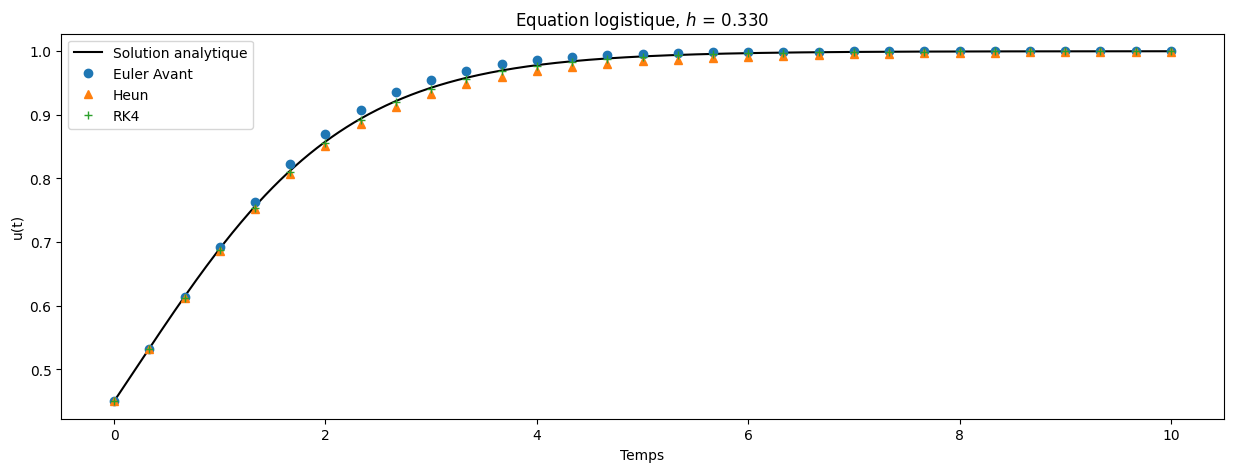

In [6]:
# Paramètres physiques (lambda représente le taux de croissance)
lmb = 1.0

# Paramètres numériques
t_max = 10.0  # Temps maximum de simulation
h = 0.33  # Pas de temps
N = int(np.floor(t_max / h)) + 1  # Nombre total de points de temps
t = np.linspace(0, t_max, N)  # Tableau de temps

# Initialisation des tableaux pour les solutions des trois méthodes
u_Euler_avant = np.zeros(N)  # Méthode d'Euler avant (forward)
u_RK2 = np.zeros(N)  # Méthode d'Heun (RK2)
u_RK4 = np.zeros(N)  # Méthode de Runge-Kutta d'ordre 4 (RK4)

# Condition initiale (à t=0, u(0) = 1)
u0 = 0.45

u_Euler_avant[0] = u0
u_RK2[0] = u0
u_RK4[0] = u0

# Boucle temporelle pour appliquer les différentes méthodes d'intégration
for i in range(N - 1):
    u_Euler_avant[i+1] = (1 + h * lmb) * u_Euler_avant[i] - \
        h * lmb * u_Euler_avant[i]**2

    u_RK2[i+1] = u_RK2[i] + (h * lmb)/2 * (u_RK2[i] * (1 - u_RK2[i]) +
                                           u_Euler_avant[i+1] * (1 - u_Euler_avant[i+1]))
    k1 = h * lmb * u_RK4[i] * (1 - u_RK4[i])
    k2 = h * lmb * (u_RK4[i] + k1/2) * (1 - u_RK4[i] - k1/2)
    k3 = h * lmb * (u_RK4[i] + k2/2) * (1 - u_RK4[i] - k2/2)
    k4 = h * lmb * (u_RK4[i] + k3) * (1 - u_RK4[i] - k3)
    u_RK4[i+1] = u_RK4[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

# Tracé des résultats
fig, ax = plt.subplots(figsize=(15, 5))

# Solution analytique de l'équation logistique
# Plus de points pour la courbe analytique
t_continu = np.linspace(0, t_max, 1001)
u_analytique = u0 / (u0 + (1-u0)*np.exp(-lmb*t_continu))  # Solution exacte

# Tracé de la solution analytique
ax.plot(t_continu, u_analytique, label='Solution analytique', color='black')

# Tracés des solutions numériques
ax.plot(t, u_Euler_avant, 'o', label='Euler Avant')
ax.plot(t, u_RK2, '^', label='Heun')
ax.plot(t, u_RK4, '+', label='RK4')

# Configuration du graphique
ax.legend()
ax.set_title('Equation logistique, $h$ = %.3f' % h)
ax.set_xlabel('Temps')
ax.set_ylabel('u(t)')
plt.show()

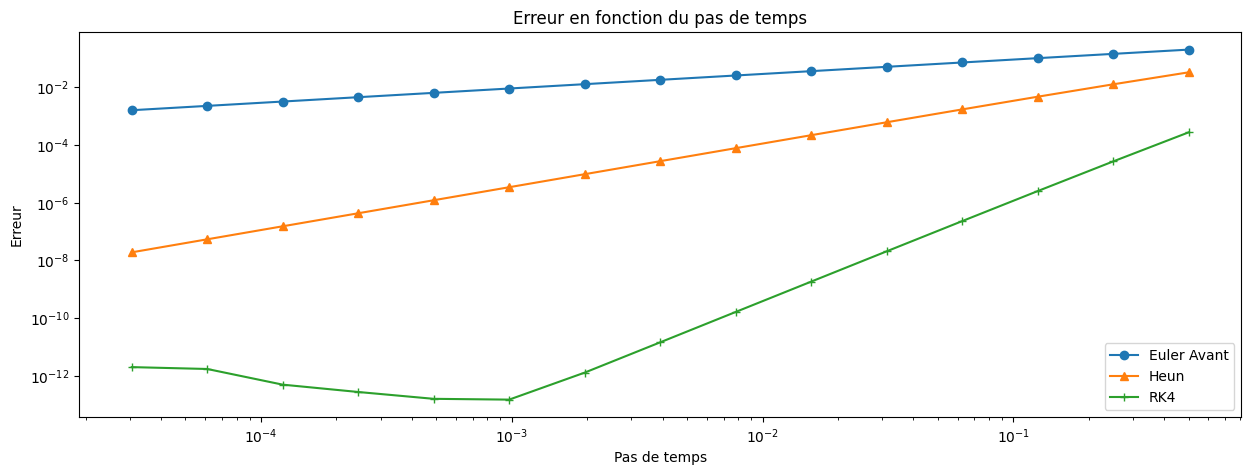

In [7]:
## Pour les méthodes explicites, on peut directement définir une routine de calcul de la solution
## qui prend en argument la fonction f(u,t), u0, le pas de temps h et le temps maximum t_max

def solve_euler_explicit(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        u[i+1] = u[i] + h * f(u[i], t[i])
    return t, u

def solve_RK2(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        utilde = u[i] + h * f(u[i], t[i])
        u[i+1] = u[i] + h/2 * (f(u[i], t[i]) + f(utilde, t[i] + h))
    return t, u

def solve_RK4(f, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    u = np.zeros(N)
    u[0] = u0
    for i in range(N - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, u

## On peut alors facilement tracer un graphique de l'erreur en fonction du pas de temps
f = lambda u, t: lmb * u * (1 - u) # Equation logistique
F = lambda t: u0 / (u0 + (1-u0)*np.exp(-lmb*t)) # Solution exacte

t_max = 10.0
u0 = 0.05

h_values = 2.0**np.arange(-15, 0, 1)

erreur_Euler_avant = np.zeros(len(h_values))
erreur_RK2 = np.zeros(len(h_values))
erreur_RK4 = np.zeros(len(h_values))

for i, h in enumerate(h_values):
    t, u_Euler_avant = solve_euler_explicit(f, u0, h, t_max)
    t, u_RK2 = solve_RK2(f, u0, h, t_max)
    t, u_RK4 = solve_RK4(f, u0, h, t_max)
    F_values = F(t)
    erreur_Euler_avant[i] = np.linalg.norm(u_Euler_avant - F_values, 2)
    erreur_RK2[i] = np.linalg.norm(u_RK2 - F_values, 2)
    erreur_RK4[i] = np.linalg.norm(u_RK4 - F_values, 2)

fig, ax = plt.subplots(figsize=(15, 5))

ax.loglog(h_values, erreur_Euler_avant, 'o-', label='Euler Avant')
ax.loglog(h_values, erreur_RK2, '^-', label='Heun')
ax.loglog(h_values, erreur_RK4, '+-', label='RK4')

ax.legend()
ax.set_title('Erreur en fonction du pas de temps')
ax.set_xlabel('Pas de temps')
ax.set_ylabel('Erreur')
plt.show()
    

In [8]:
# Clear the kernel and variables
%reset -f

## Exercice 3 : oscillateur harmonique
Intégrer avec les trois méthodes d'Euler, Heun et RK4 le système suivant :
$$
	\Leftrightarrow \left\{
	\begin{aligned}
		\frac{d\vec{y}}{dt} &= \mathbf{A}\vec{y}\\
		\vec{y}(t=0) &= \vec{y_0}
	\end{aligned}
	\right.
$$

avec $\vec{y}(t) = \begin{pmatrix}
		x(t)\\
		v(t)
	\end{pmatrix}$, $\mathbf{A} = \begin{pmatrix}
		0 & 1\\
		-\omega^2 & 0
	\end{pmatrix}$ et $\vec{y_0} = \begin{pmatrix}
	x_0\\
	v_0
	\end{pmatrix}$

## Solution
Pour les méthodes explicites, on définira directement une fonction similairement à l'exercice précédent. Pour les méthodes implicites ou semi-implicites, il est nécéssaire de discrétiser le système.

## Euler arrière :
$$\vec{y}_{i+1} = \vec{y}_{i} + h\mathbf{A}\vec{y}_{i+1}$$
$$\Rightarrow \vec{y}_{i+1} = (\mathbf{I} - h\mathbf{A})^{-1}\vec{y}_{i}$$


## Euler centré :
$$\Rightarrow \vec{y}_{i+1} = \left(\mathbf{I} - \frac{h}{2}\mathbf{A}\right)^{-1}\left(\mathbf{I} + \frac{h}{2}\mathbf{A}\right)\vec{y}_{i}$$

In [9]:
# (Re)load the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Define the solver function, taking as imput arguments the matrix A, the initial condition u0 (vector), the time step h and the final time t_max
def solve_euler_forward_linear_system(A, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    n = len(u0)
    u = np.zeros((n, N))
    u[:, 0] = u0
    for i in range(N - 1):
        u[:, i+1] = u[:, i] + h * A @ u[:, i]
    return t, u

def solve_euler_backward_linear_system(A, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    n = len(u0)
    u = np.zeros((n, N))
    u[:, 0] = u0
    for i in range(N - 1):
        u[:, i+1] = np.linalg.solve(np.eye(n) - h * A, u[:, i])
        # Equivalent to: (but faster !)
        # u[:, i+1] = np.linalg.inv(np.eye(n) - h * A) @ u[:, i]
        # /!\ A**(-1) or 1/A does not mean the inverse of A in Python, it is elementwise division
    return t, u

def solve_euler_centred_linear_system(A, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    n = len(u0)
    u = np.zeros((n, N))
    u[:, 0] = u0
    for i in range(N - 1):
        u[:, i+1] = np.linalg.solve(np.eye(n) - h/2 * A, (np.eye(n) + h/2 * A) @ u[:, i])
    return t, u

def solve_RK2_linear_system(A, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    n = len(u0)
    u = np.zeros((n, N))
    u[:, 0] = u0
    for i in range(N - 1):
        utilde = u[:, i] + h * A @ u[:, i]
        u[:, i+1] = u[:, i] + h/2 * (A @ u[:, i] + A @ utilde)
    return t, u

def solve_RK4_linear_system(A, u0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    n = len(u0)
    u = np.zeros((n, N))
    u[:, 0] = u0
    for i in range(N - 1):
        k1 = h * A @ u[:, i]
        k2 = h * A @ (u[:, i] + k1/2)
        k3 = h * A @ (u[:, i] + k2/2)
        k4 = h * A @ (u[:, i] + k3)
        u[:, i+1] = u[:, i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, u

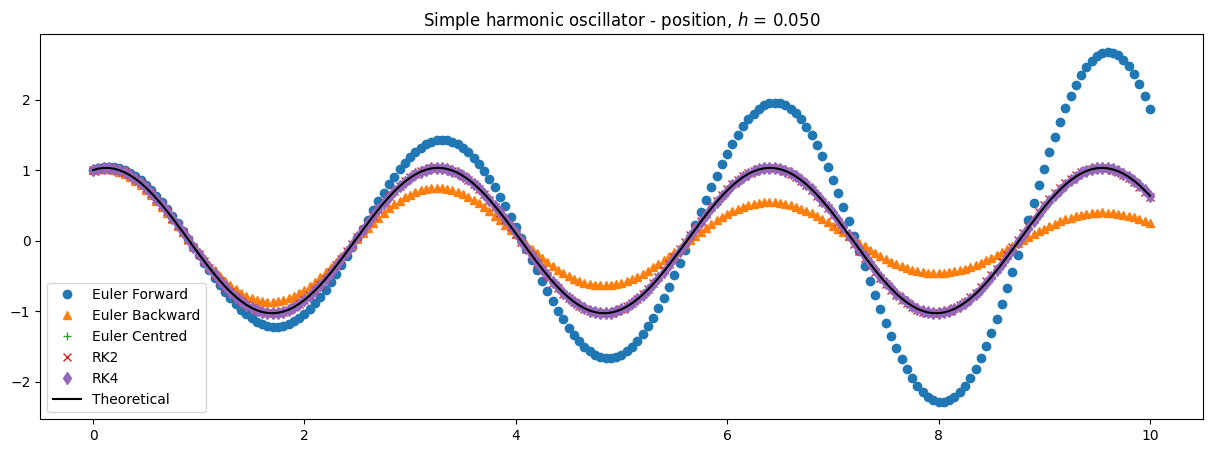

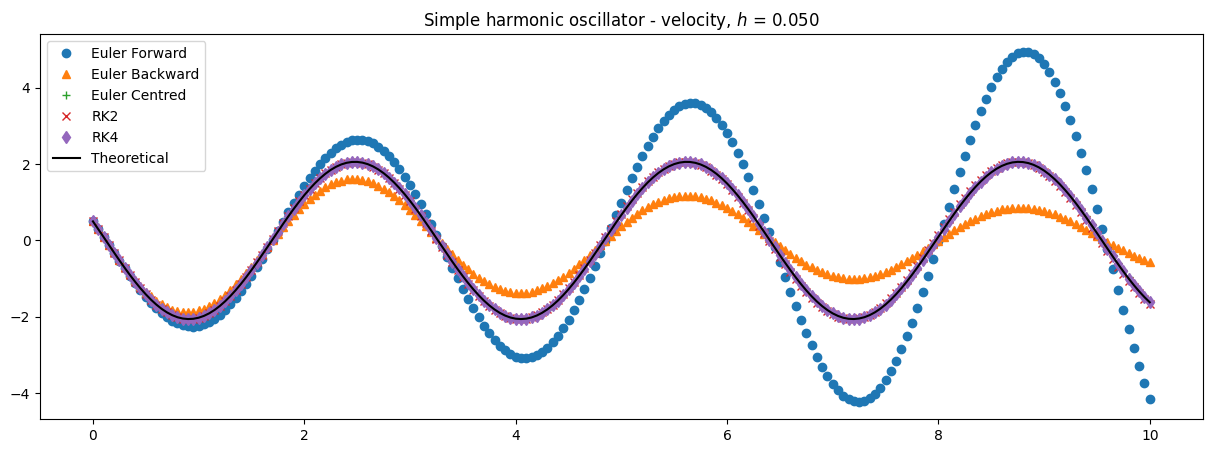

In [10]:
w = 2.0 # Omega, the angular velocity
A = np.array([[0.0, 1.0], [-w**2, 0.0]])
u0 = np.array([1.0, 0.5])

h, t_max = 0.05, 10.0

# Solve the linear system using the different methods
t, u_Euler_forward = solve_euler_forward_linear_system(A, u0, h, t_max)
t, u_Euler_backward = solve_euler_backward_linear_system(A, u0, h, t_max)
t, u_Euler_centred = solve_euler_centred_linear_system(A, u0, h, t_max)
t, u_RK2 = solve_RK2_linear_system(A, u0, h, t_max)
t, u_RK4 = solve_RK4_linear_system(A, u0, h, t_max)

# Theoretical solution : u(t) = exp(t A) u0
u_theoretical = np.zeros((2, len(t)))
for i in range(len(t)):
    u_theoretical[:, i] = sp.linalg.expm(t[i] * A) @ u0

# Plot the results u = [position, velocity]
fig_x, ax_x = plt.subplots(figsize=(15, 5))

ax_x.plot(t, u_Euler_forward[0, :], 'o', label='Euler Forward')
ax_x.plot(t, u_Euler_backward[0, :], '^', label='Euler Backward')
ax_x.plot(t, u_Euler_centred[0, :], '+', label='Euler Centred')
ax_x.plot(t, u_RK2[0, :], 'x', label='RK2')
ax_x.plot(t, u_RK4[0, :], 'd', label='RK4')
ax_x.plot(t, u_theoretical[0, :], '-', label='Theoretical', color='black')

ax_x.legend()
ax_x.set_title('Simple harmonic oscillator - position, $h$ = %.3f' % h)

fig_v, ax_v = plt.subplots(figsize=(15, 5))

ax_v.plot(t, u_Euler_forward[1, :], 'o', label='Euler Forward')
ax_v.plot(t, u_Euler_backward[1, :], '^', label='Euler Backward')
ax_v.plot(t, u_Euler_centred[1, :], '+', label='Euler Centred')
ax_v.plot(t, u_RK2[1, :], 'x', label='RK2')
ax_v.plot(t, u_RK4[1, :], 'd', label='RK4')
ax_v.plot(t, u_theoretical[1, :], '-', label='Theoretical', color='black')

ax_v.legend()
ax_v.set_title('Simple harmonic oscillator - velocity, $h$ = %.3f' % h)

plt.show()

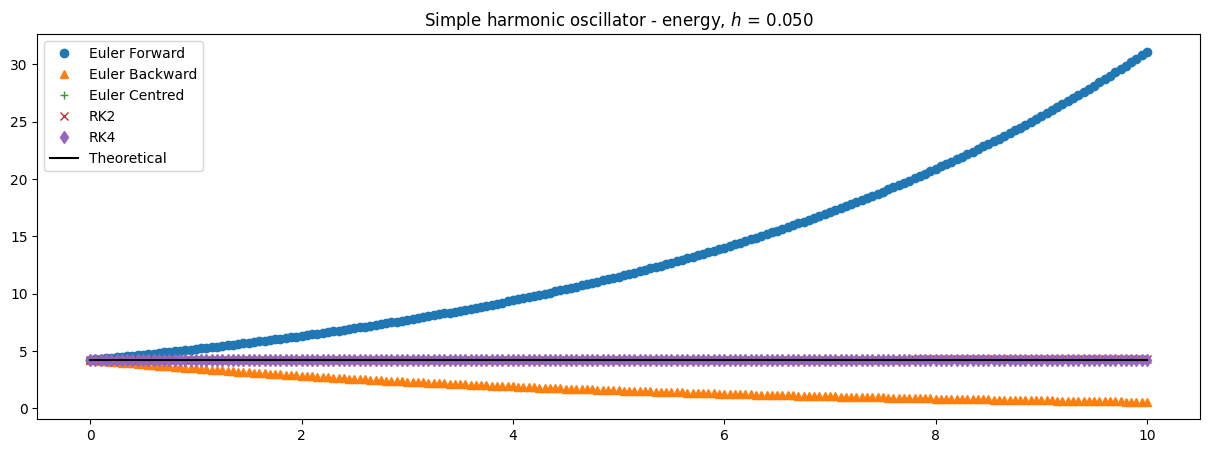

In [11]:
# Plot the energy of the system
energy_Euler_forward = w**2 * u_Euler_forward[0, :]**2 + u_Euler_forward[1, :]**2
energy_Euler_backward = w**2 * u_Euler_backward[0, :]**2 + u_Euler_backward[1, :]**2
energy_Euler_centred = w**2 * u_Euler_centred[0, :]**2 + u_Euler_centred[1, :]**2
energy_RK2 = w**2 * u_RK2[0, :]**2 + u_RK2[1, :]**2
energy_RK4 = w**2 * u_RK4[0, :]**2 + u_RK4[1, :]**2
energy_theoretical = w**2 * u_theoretical[0, :]**2 + u_theoretical[1, :]**2

fig_energy, ax_energy = plt.subplots(figsize=(15, 5))

ax_energy.plot(t, energy_Euler_forward, 'o', label='Euler Forward')
ax_energy.plot(t, energy_Euler_backward, '^', label='Euler Backward')
ax_energy.plot(t, energy_Euler_centred, '+', label='Euler Centred')
ax_energy.plot(t, energy_RK2, 'x', label='RK2')
ax_energy.plot(t, energy_RK4, 'd', label='RK4')
ax_energy.plot(t, energy_theoretical, '-', label='Theoretical', color='black')

ax_energy.legend()
ax_energy.set_title('Simple harmonic oscillator - energy, $h$ = %.3f' % h)

plt.show()

# => Euler centré, RK2 et RK4 semblent conservatifs, Euler forward et backward ne le sont clairement pas

# Exercice 4 : schémas symplectiques pour l'oscillateur harmonique
L'hamiltonien de l'oscillateur harmonique classique est le suivant :
$$\mathcal{H}(p, x) = \frac{p^2}{2m} + \frac{m\omega^2x^2}{2} \text{ avec } p = mv$$

## Störmer-Verlet :

$$\begin{align*}
	p_{i+1/2} &= p_i - \frac{h}{2} m \omega^2 q_i \\
	q_{i+1} &= q_i + h \frac{p_{i+1/2}}{m}\\
	p_{i+1} &= p_{i+1/2} - \frac{h}{2}m \omega^2 q_{i+1}
\end{align*}$$

$$\begin{align*}
	\Rightarrow q_{i+1} &= \left(1-\frac{h^2\omega^2}{2}\right)q_i + \frac{h}{m}p_i\\
	p_{i+1} &= \left(1-\frac{h^2\omega^2}{2}\right)p_i + hm\omega^2\left(\frac{h^2\omega^2}{4}-1\right)q_i
\end{align*}$$

In [16]:
# define a solving function, taking as input the parameters of the problem, the initial condition u0, the time step h and the final time t_max
def solve_verlet(m, omega, p0, q0, h, t_max):
    N = int(np.floor(t_max / h)) + 1
    t = np.linspace(0, t_max, N)
    p = np.zeros(N)
    q = np.zeros(N)
    p[0] = p0
    q[0] = q0
    for i in range(N - 1):
        q[i+1] = (1.0 - ((h * omega)**2) /2.0) * q[i] + h/m * p[i]
        p[i+1] = (1.0 - ((h * omega)**2) /2.0) * p[i] + h * m * omega**2 * (((h * omega)**2) / 4.0 - 1.0) * q[i]
    return t, p, q

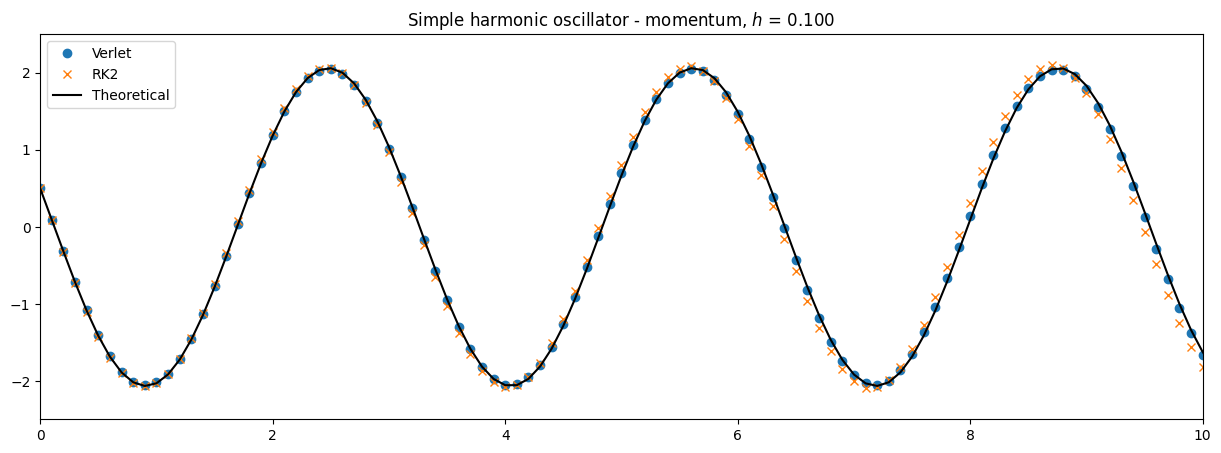

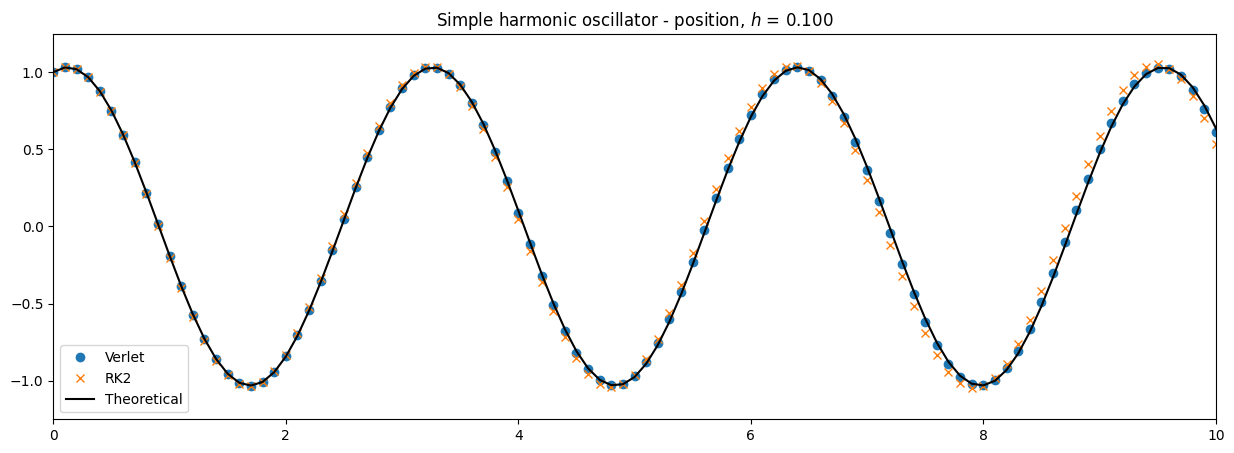

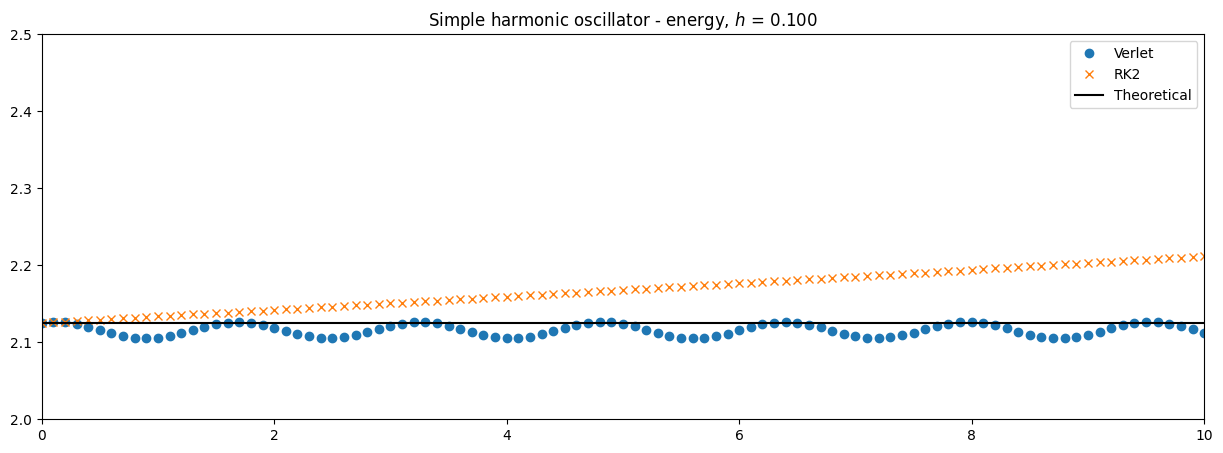

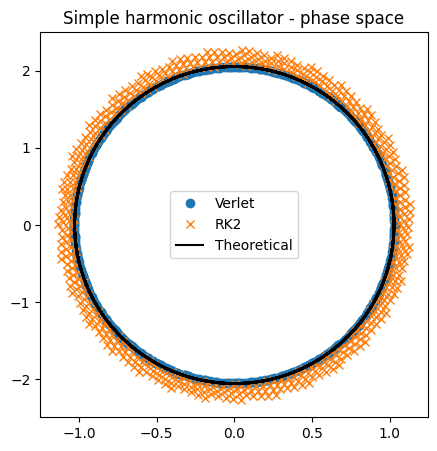

In [17]:
# Verlet solution
m, w = 1.0, 2.0
p0, q0 = 0.5, 1.0

h = 0.1
t_max = 50.0

t_verlet, p, q = solve_verlet(m, w, p0, q0, h, t_max)

# Heun solution with p = mv and q = x
A = np.array([[0.0, 1.0], [-w**2, 0.0]])
u0 = np.array([q0, p0/m])

t_RK2, u_RK2 = solve_RK2_linear_system(A, u0, h, t_max)

# Theoretical solution
u_theoretical = np.zeros((2, len(t_verlet)))
for i in range(len(t_verlet)):
    u_theoretical[:, i] = sp.linalg.expm(t_verlet[i] * A) @ u0

# Energy of the system
energy_verlet = p**2 / (2*m) + m * w**2 * q**2 / 2
energy_RK2 = m * w**2 * u_RK2[0, :]**2 / 2 + m * u_RK2[1, :]**2 / 2
energy_theoretical = m * w**2 * u_theoretical[0, :]**2 / 2 + m * u_theoretical[1, :]**2 / 2

# Plot the results
fig_p, ax_p = plt.subplots(figsize=(15, 5))

ax_p.plot(t_verlet, p, 'o', label='Verlet')
ax_p.plot(t_RK2, m * u_RK2[1, :], 'x', label='RK2')
ax_p.plot(t_verlet, m * u_theoretical[1,:], '-', label='Theoretical', color='black')
ax_p.set_xlim(0, 10)

ax_p.legend()
ax_p.set_title('Simple harmonic oscillator - momentum, $h$ = %.3f' % h)

fig_q, ax_q = plt.subplots(figsize=(15, 5))

ax_q.plot(t_verlet, q, 'o', label='Verlet')
ax_q.plot(t_RK2, u_RK2[0, :], 'x', label='RK2')
ax_q.plot(t_verlet, u_theoretical[0,:], '-', label='Theoretical', color='black')
ax_q.set_xlim(0, 10)

ax_q.legend()
ax_q.set_title('Simple harmonic oscillator - position, $h$ = %.3f' % h)

fig_energy, ax_energy = plt.subplots(figsize=(15, 5))

ax_energy.plot(t_verlet, energy_verlet, 'o', label='Verlet')
ax_energy.plot(t_RK2, energy_RK2, 'x', label='RK2')
ax_energy.plot(t_verlet, energy_theoretical, '-', label='Theoretical', color='black')
ax_energy.set_xlim(0, 10)
ax_energy.set_ylim(2.0, 2.5)

ax_energy.legend()
ax_energy.set_title('Simple harmonic oscillator - energy, $h$ = %.3f' % h)

# Plot the phase space trajectory in a square plot
fig_phase_space, ax_phase_space = plt.subplots(figsize=(5, 5))

ax_phase_space.plot(q, p, 'o', label='Verlet')
ax_phase_space.plot(u_RK2[0, :], m * u_RK2[1, :], 'x', label='RK2')
ax_phase_space.plot(u_theoretical[0, :], m * u_theoretical[1, :], '-', label='Theoretical', color='black')

ax_phase_space.legend()
ax_phase_space.set_title('Simple harmonic oscillator - phase space')

plt.show()

# => Verlet est bien conservatif mais pas Heun contrairement à ce qui était apperçu avec les méthodes d'Euler, attention aux odres de grandeur

In [18]:
# Clear the kernel and variables
%reset -f